In [9]:
from sqlalchemy import create_engine
from sshtunnel import SSHTunnelForwarder
import testing
import matplotlib.pyplot as plt
import numpy as np
ip = "147.32.83.171"

In [2]:
ssh_tunnel = SSHTunnelForwarder(
    ip,
        ssh_username='syrovzde',
        ssh_private_key='C:\\Users\\zdesi\\.ssh\\syrovzde_rsa',
        remote_bind_address=('localhost', 5432)
    )
ssh_tunnel.start()
engine = create_engine("postgresql://{user}@{host}:{port}/{db}".format(
        host='localhost',
        port=ssh_tunnel.local_bind_port,
        user='syrovzde',
        db='asianodds'
    ))
result_engine = create_engine("postgresql://{user}@{host}:{port}/{db}".format(
        host='localhost',
        port=ssh_tunnel.local_bind_port,
        user='syrovzde',
        db='betexplorer'
    ))



In [6]:
testing_probs = [0.5,0.6,0.7,0.8,0.9,0.95,0.975,1]
results = {}
for p in testing_probs:
   results[p]=testing.test(p=p,matchids=[0], timestamp='2022-09-27 21:00:00',engine=engine,res_engine=result_engine)

0.8514851485148515
0.8514851485148515
0.8415841584158416
0.8415841584158416
0.8415841584158416
0.8415841584158416
0.8415841584158416
0.8415841584158416


In [10]:
cumulative_sums = {}
lengths = {}
for p in testing_probs:
    cumulative_sums[p]=np.cumsum(results[p])
    lengths[p] = len(results[p])

In [34]:
def legend_without_duplicate_labels(figure):
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    figure.legend(by_label.values(), by_label.keys(), loc='lower right')

0.5
0.6
0.7
0.8
0.9
0.95
0.975
1


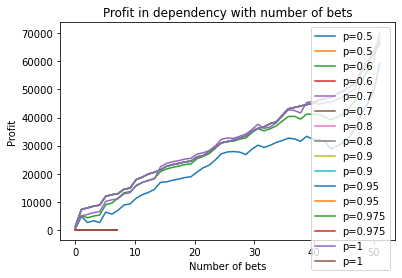

In [50]:
all_xs = []
all_ys = []

for i in testing_probs:
    print(i)
    plt.plot(np.linspace(0,lengths[i],lengths[i]),cumulative_sums[i],testing_probs,label="p={p}".format(p=i))

plt.title("Profit in dependency with number of bets")
plt.xlabel("Number of bets")
plt.ylabel("Profit")
plt.legend()
plt.show()